# <font color='lightblue'>Computer Vision</font>

En este notebook veremos como implementar una arquitectura de red para procesar imágenes y que aprenda a obtener patrones (pixeles) que le sirvan para hacer una clasificación.

Usaremos el dataset [Food101](https://www.kaggle.com/datasets/dansbecker/food-101) para distintas tareas. Espero que no les de hambre xd.

Veremos:
1. Clasificación binaria (sigmoid).
2. Clasificación multi-clase (softmax/argmax).
3. Transfer Learning.

## 1. Clasificación binaria de imágenes

Primero cargamos el dataset que contiene solo imágenes de pizzas y steaks(carne) para entrenar una red neuronal convolucional para clasificación binaria.



### Cargamos el dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-16 15:19:13--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   217MB/s    in 0.5s    

2023-10-16 15:19:13 (217 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!nvidia-smi

Mon Oct 16 15:19:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## Extraemos del archivo zip las carpetas
import zipfile
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

>**Nota:** La estructura de carpetas bajo el nombre de train o test y luego bajo el nombre de pizza o steak en cada caso, es el tipo de estructura que necesita `TensorFlow` para saber cual es la carpeta de entrenamiento y testeo, y cual es la clase (etiqueta) de cada grupo de imagen. Con esta clase que encuentra en el nombre de la carpeta es la que va a utilizar para entrenarse.

In [ ]:
import os
os.listdir('pizza_steak/test/pizza')

['3392194.jpg',
 '1445608.jpg',
 '80750.jpg',
 '2161321.jpg',
 '482858.jpg',
 '2203687.jpg',
 '3724353.jpg',
 '226472.jpg',
 '2572488.jpg',
 '723745.jpg',
 '242976.jpg',
 '138961.jpg',
 '2841536.jpg',
 '1001116.jpg',
 '3092704.jpg',
 '2398925.jpg',
 '1503858.jpg',
 '2549661.jpg',
 '3827990.jpg',
 '3456604.jpg',
 '2478221.jpg',
 '1980749.jpg',
 '415551.jpg',
 '1618659.jpg',
 '1686938.jpg',
 '2242047.jpg',
 '3174637.jpg',
 '1223284.jpg',
 '1067986.jpg',
 '614236.jpg',
 '341377.jpg',
 '300157.jpg',
 '2871261.jpg',
 '419962.jpg',
 '153195.jpg',
 '2997525.jpg',
 '3316410.jpg',
 '204151.jpg',
 '1060407.jpg',
 '124815.jpg',
 '1398213.jpg',
 '522543.jpg',
 '2406842.jpg',
 '194784.jpg',
 '53217.jpg',
 '139987.jpg',
 '398345.jpg',
 '2827154.jpg',
 '2323860.jpg',
 '1265335.jpg',
 '420409.jpg',
 '1180273.jpg',
 '2517724.jpg',
 '1925494.jpg',
 '2157510.jpg',
 '2944567.jpg',
 '121960.jpg',
 '969461.jpg',
 '2992605.jpg',
 '3650727.jpg',
 '1991586.jpg',
 '346091.jpg',
 '2971095.jpg',
 '852436.jpg',
 '

In [ ]:
# Exploramos las carpetas un poco...
import os

for dir, dirname, files in os.walk('pizza_steak'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: pizza_steak | subdir: ['train', 'test'] | cant de imagenes: 0 
Dir: pizza_steak/train | subdir: ['pizza', 'steak'] | cant de imagenes: 0 
Dir: pizza_steak/train/pizza | subdir: [] | cant de imagenes: 750 
Dir: pizza_steak/train/steak | subdir: [] | cant de imagenes: 750 
Dir: pizza_steak/test | subdir: ['pizza', 'steak'] | cant de imagenes: 0 
Dir: pizza_steak/test/pizza | subdir: [] | cant de imagenes: 250 
Dir: pizza_steak/test/steak | subdir: [] | cant de imagenes: 250 


Vemos que la carpeta `train` contiene 750 imágenes de pizza y 750 de steak.

La carpeta `test` contiene 250 imágenes de pizza y 250 imágenes de steak.

In [ ]:
#Guardamos el nombre de las carpetas que haya dentro de train en una lista
# se puede hacer a mano pero a veces son muchas y podemos cometer errores.

classes = [f for f in os.listdir('pizza_steak/train/')]
print(classes)

['pizza', 'steak']


### Visualizamos algunos ejemplos del dataset

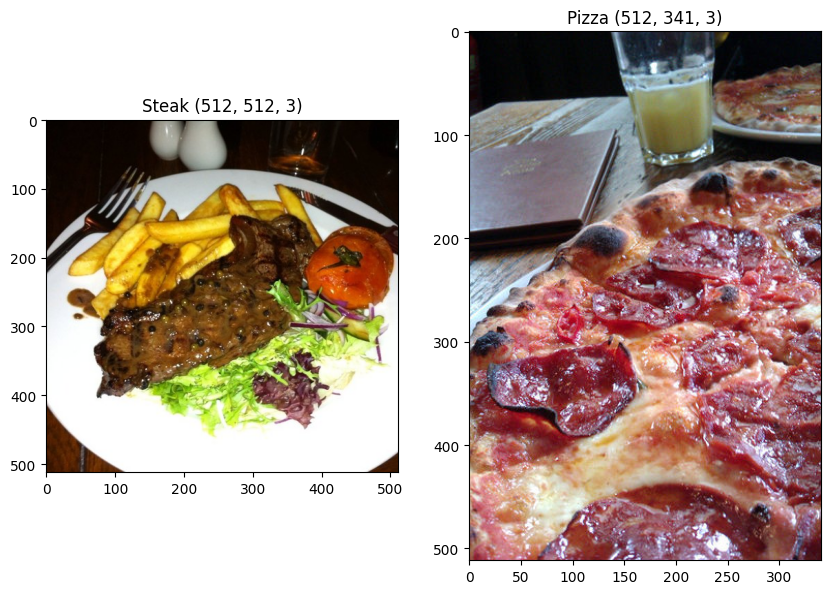

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(10,7))
id = random.choice(range(0,749))
plt.subplot(1,2,1)
img_name = [f for f in os.listdir('pizza_steak/train/steak/')][id]
img = plt.imread('pizza_steak/train/steak/'+img_name)
plt.imshow(img)
plt.title('Steak '+str(img.shape))
plt.subplot(1,2,2)
img_name = [f for f in os.listdir('pizza_steak/train/pizza/')][id]
img = plt.imread('pizza_steak/train/pizza/'+img_name)
plt.imshow(img)
plt.title('Pizza '+str(img.shape));

In [ ]:
#Exploramos los características de las imágenes
lista_img_pizza = [f for f in os.listdir('pizza_steak/train/pizza/')]
imagen_prueba = plt.imread('pizza_steak/train/pizza/'+lista_img_pizza[23]) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {imagen_prueba.shape}")
print(f"Dimensiones de la imagen: {imagen_prueba.ndim}")
print(f"Codificación la imagen: {imagen_prueba.dtype}")
print(f"Pixel de mayor valor: {imagen_prueba.max()}")
print(f"Pixel de menor valor: {imagen_prueba.min()}")

Shape de la imagen: (511, 512, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 255
Pixel de menor valor: 0


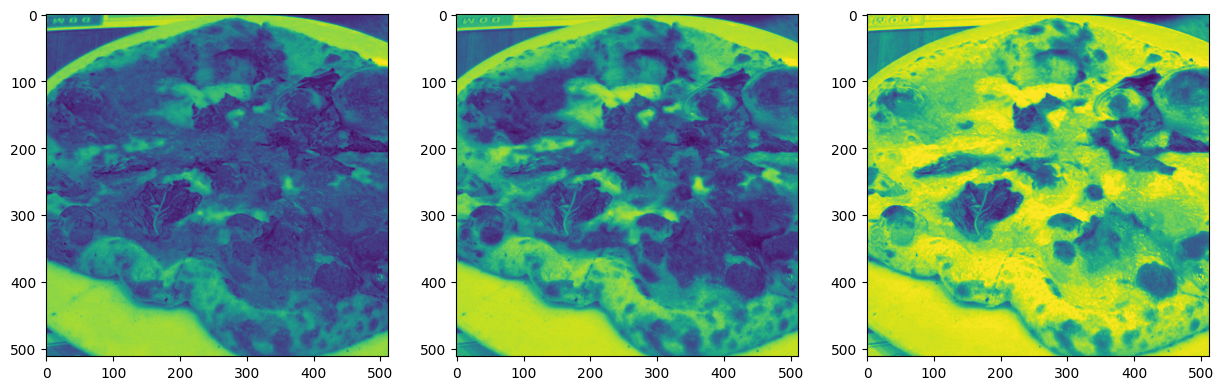

In [ ]:
import cv2
imagen_prueba = cv2.imread('pizza_steak/train/pizza/'+lista_img_pizza[22])
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(imagen_prueba[:,:,0],cmap=None)
plt.subplot(1,3,2)
plt.imshow(imagen_prueba[:,:,1],cmap=None)
plt.subplot(1,3,3)
plt.imshow(imagen_prueba[:,:,2],cmap=None);

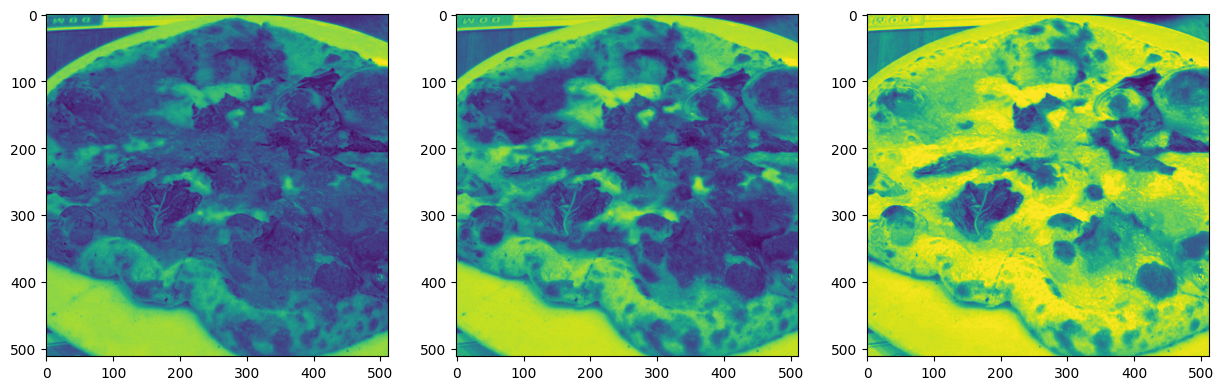

In [ ]:
import cv2
imagen_prueba = cv2.imread('pizza_steak/train/pizza/'+lista_img_pizza[22])
b,g,r =  cv2.split(imagen_prueba)
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(b,cmap=None)
plt.subplot(1,3,2)
plt.imshow(g,cmap=None)
plt.subplot(1,3,3)
plt.imshow(r,cmap=None);

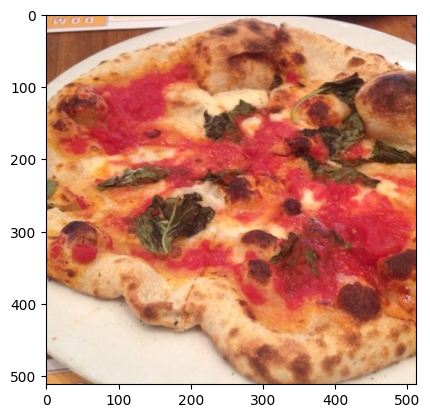

In [ ]:
imagen_reconstruida = cv2.merge([r,g,b])
plt.imshow(imagen_reconstruida);

### Creamos la arquitectura de una red neuronal convolucional
Vamos a construir una red neuronal convolucional para encontrar patrones en nuestras imágenes, más específicamente, necesitamos una forma de:
* Cargar la imágenes con TensorFlow
* Preprocesar las imágenes para escalarlas.
* Construir la red convolucional para clasificación
* Compilar la CNN
* Entrenar la CNN con los datos de entrenamiento.

In [ ]:
# Primero instanciamos el generador de dataset
# Este lo que hace es permitirnos preprocesar las imagenes (rescalarlas y aplicarles tecnicas de data augmentation)
import tensorflow as tf
tf.random.set_seed(42) #usamos este seed para que cada vez que ejecutemos la celda nos repetira los mismos valores, se usa mucho cuando queremos replicar experimentos

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,#Data augmentation
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary') #multiclass -> 'categorical' [001,100,010]

test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='binary')


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
imagenes, etiquetas = train_batch[0]
print(len(imagenes),len(etiquetas))

32 32


In [ ]:
classes

['pizza', 'steak']

In [ ]:
etiquetas

array([1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
import tensorflow as tf
#Creamos la red convolucional

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=((224,224,3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 38634241 (147.38 MB)
Trainable params: 38634241 (147.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observamos que la cantidad de parámetros en una red fully connected, con solo capas profundas para entrenar con imágenes, resulta muy grande. Y con esto crece la necesidad de poder de computo a la vez que la red tiene que aprender pixel a pixel, lo cual lleva mucho más tiempo.

Una solución a esto es incorporar capas de filtrado, que filtren solo aquella información de la imagen que la red "crea" que es importante. Con esto la cantidad de parámetros se reduce a solo los parametros de dichos filtros, que resultan en menor cantidad y tiempo de procesamiento.

In [ ]:
#Creamos la red convolucional

model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(5, kernel_size=(3,3), activation='relu'), #Conv -> Maxpooling -> Conv -> Maxpooling -> Flatten(vectorización) -> DNN
    tf.keras.layers.MaxPool2D(strides=(1,1)),
    tf.keras.layers.Conv2D(5, 3, activation='relu'), #otra forma de definir el kernel
    tf.keras.layers.MaxPool2D(strides=(1,1)),
    tf.keras.layers.Dropout((0.20)),
    tf.keras.layers.Conv2D(5, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Flatten(), #se vectoriza
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 5)       140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 221, 221, 5)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 219, 219, 5)       230       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 218, 218, 5)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 218, 218, 5)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 216, 216, 5)      

In [ ]:
## Compilamos el modelo
model_0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
## Entrenamos el modelo
model_0.fit(train_batch,#batch trae la tupla de [xtrain, ytrain]
            epochs=100,
            validation_data = test_batch, #(imagenes, etiquetas)
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_0',save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_0'),
                         tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
47/47 [==============================] - 22s 220ms/step - loss: 0.7481 - accuracy: 0.6173 - precision: 0.6290 - recall: 0.5720 - val_loss: 0.5843 - val_accuracy: 0.6840 - val_precision: 0.6825 - val_recall: 0.6880
Epoch 2/100
47/47 [==============================] - 6s 134ms/step - loss: 0.5887 - accuracy: 0.6860 - precision: 0.7117 - recall: 0.6253 - val_loss: 0.6519 - val_accuracy: 0.6460 - val_precision: 0.6046 - val_recall: 0.8440
Epoch 3/100
47/47 [==============================] - 10s 208ms/step - loss: 0.6093 - accuracy: 0.6673 - precision: 0.6806 - recall: 0.6307 - val_loss: 0.5568 - val_accuracy: 0.7240 - val_precision: 0.7435 - val_recall: 0.6840
Epoch 4/100
47/47 [==============================] - 7s 148ms/step - loss: 0.5729 - accuracy: 0.7120 - precision: 0.7373 - recall: 0.6587 - val_loss: 0.5607 - val_accuracy: 0.7100 - val_precision: 0.6829 - val_recall: 0.7840
Epoch 5/100
47/47 [==============================] - 9s 188ms/step - loss: 0.5360 - accuracy: 0.73

### Evaluamos el modelo

Para esto vamos a importarlo de la carpeta donde se guardaron los checkpoints.

In [ ]:
model_0 = tf.keras.models.load_model('/content/checkpoints/model_0')

In [ ]:
model_0.evaluate(test_batch)

16/16 [==============================] - 2s 86ms/step - loss: 0.3907 - accuracy: 0.8220 - precision: 0.8286 - recall: 0.8120


[0.39069345593452454,
 0.8220000267028809,
 0.8285714387893677,
 0.8119999766349792]

In [ ]:
# Podemos ver las métricas con TensorBoard que guardamos durante el entrenamiento
!tensorboard dev upload --logdir=logs/model_0  #tensorboard --logdir=

2023-10-16 15:25:31.541600: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/model_0

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 46, in run_main
  File "/usr/local/lib/python3.10/dist-packages/absl/app.py",

### Hacemos una predicción

In [ ]:
# Elegimos una imagen de dataset a gusto
img = plt.imread('/content/pizza_steak/test/pizza/1180273.jpg')

#Rescalamos la imagen para introducirla al modelo
img = img/255.
# Tensorflow usa float16 / float32

#Ajustamos la imagen a 224,224,3

img.resize((224,224,3))
img_expanded = tf.expand_dims(img, axis=0) # TensorFlow (None, 224, 224 ,3) np.expand_dims(img,axis=0)

y_pred = model_0.predict(img_expanded)
print(y_pred)

1/1 [==============================] - 0s 192ms/step
[[0.41724923]]


In [ ]:
# A la salida del modelo le quitamos la dimensión extra que tiene y redondeamos el valor a la clase más cercana (en este caso 0)
y_pred = tf.squeeze(y_pred) # Eliminar dimensiones vacias [[0.005]] -> [0.005]
y_pred = tf.round(y_pred)
print(f"La predicción para la imagen de pizza es: {y_pred} ")

La predicción para la imagen de pizza es: 0.0 


# Ejercicio 1

### 🛠️ Ajustamos los hiperparametros para mejorar las métricas del modelo con el set de testeo 🤓

Acá podemos probar de cambiar algunos hiperparámetros:
1. La cantidad de filtros de las capas convolucionales pueden ir creciendo (16, 32,64)
2. El tamaño del kernel de los filtros también puede crecer 7x7, 9x7, 11x11.
3. Podemos implementar data augmentation.
4. Podemos usar dropout en la red profunda.
5. Podemos cambiar el learning rate.

### Data augmentation

Implementamos data augmentation

In [ ]:
import tensorflow as tf
tf.random.set_seed(10)

train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 horizontal_flip=True,
                                                                 vertical_flip=True)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary')

test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Red convolucional
Creamos la red convolucional

In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Aumentamos los filtros de las capas convolucionales.

Aumentamos el tamaño del kernel de los filtros.

Utilizamos el dropout en la red profunda

In [ ]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(7, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout((0.01)),
    tf.keras.layers.Conv2D(7, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(7, kernel_size=(5,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Compilamos el modelo.

Cambio del learning rate.

Entrenamiento del modelo.

In [ ]:
model_0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_0.fit(train_batch,
            epochs=100,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_0', save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_0'),
                         tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
47/47 [==============================] - 11s 181ms/step - loss: 0.5953 - accuracy: 0.6893 - precision_1: 0.7247 - recall_1: 0.6107 - val_loss: 0.5237 - val_accuracy: 0.7400 - val_precision_1: 0.6961 - val_recall_1: 0.8520
Epoch 2/100
47/47 [==============================] - 8s 162ms/step - loss: 0.5051 - accuracy: 0.7620 - precision_1: 0.7779 - recall_1: 0.7333 - val_loss: 0.4384 - val_accuracy: 0.8180 - val_precision_1: 0.8565 - val_recall_1: 0.7640
Epoch 3/100
47/47 [==============================] - 7s 145ms/step - loss: 0.4624 - accuracy: 0.7913 - precision_1: 0.7989 - recall_1: 0.7787 - val_loss: 0.4175 - val_accuracy: 0.8040 - val_precision_1: 0.7639 - val_recall_1: 0.8800
Epoch 4/100
47/47 [==============================] - 8s 167ms/step - loss: 0.4400 - accuracy: 0.8047 - precision_1: 0.8152 - recall_1: 0.7880 - val_loss: 0.3976 - val_accuracy: 0.8200 - val_precision_1: 0.7899 - val_recall_1: 0.8720
Epoch 5/100
47/47 [==============================] - 6s 125ms/step 

### Evaluación del modelo

In [ ]:
model_0 = tf.keras.models.load_model('/content/checkpoints/model_0')
model_0.evaluate(test_batch)

16/16 [==============================] - 2s 138ms/step - loss: 0.3244 - accuracy: 0.8460 - precision_1: 0.8531 - recall_1: 0.8360


[0.3244306147098541,
 0.8460000157356262,
 0.8530611991882324,
 0.8360000252723694]

### Comparaciones

*   Cantidad de filtros de capas convolucionales modificada de 5 a 7.
*   Tamaño de kernel modificado de 3x3 a 5x5.
*   Data augmentation extra implementada: horizontal_flip, vertical_flip.
*   Dropout utilizado en la red profunda con un valor de 0.01.
*   Learning rate modificado de 0.0001 a 0.00015.
*   Score anterior:
```
loss: 0.3907 - accuracy: 0.8220 - precision: 0.8286 - recall: 0.8120
```
*   Score mejorado:
```
loss: 0.3244 - accuracy: 0.8460 - precision_1: 0.8531 - recall_1: 0.8360
```









---



## 2. Clasificación multiclase de imágenes

Para este ejercicio tomaremos 10 comidas del mismo dataset original.

Lo importamos en formato zip, por lo que despues lo descomprimimos usando `zipfile`.

Para este ejercicio deberán seguir los siguientes pasos:
1. Convertirse uno con los datos. Es decir, exploren a fondo el dataset para tener un entendimiento total.
2. Preprocesar los datos.
3. Crear un modelo.
4. Compilar el modelo
5. Entrenar el modelo.
6. Evaluar el modelo.
7. Ajustar diferentes hiperparámetros y mejorar el modelo (intentar superar las metricas que ya se tienen y reducir el sobreajuste).
8. Repetir los pasos hasta que las metricas sean las deseadas.

### Cargamos el dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-10-16 15:30:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c03::cf, 2607:f8b0:4023:c06::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   160MB/s    in 3.1s    

2023-10-16 15:30:37 (160 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
## Extraemos del archivo zip las carpetas
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Exploramos las carpetas...
import os
for dir, dirname, files in os.walk('10_food_classes_all_data'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: 10_food_classes_all_data | subdir: ['train', 'test'] | cant de imagenes: 0 
Dir: 10_food_classes_all_data/train | subdir: ['ramen', 'ice_cream', 'pizza', 'chicken_wings', 'grilled_salmon', 'fried_rice', 'steak', 'hamburger', 'chicken_curry', 'sushi'] | cant de imagenes: 0 
Dir: 10_food_classes_all_data/train/ramen | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/ice_cream | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/pizza | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/chicken_wings | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/grilled_salmon | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/fried_rice | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/steak | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/hamburger | subdir: [] | cant de imagenes: 750 
Dir: 10_food_classes_all_data/train/chicken_curry |

Vemos que la carpeta `train` contiene 750 imágenes de cada clase: ['sushi', 'chicken_wings', 'chicken_curry', 'pizza', 'hamburger', 'grilled_salmon', 'fried_rice', 'steak', 'ice_cream', 'ramen']

La carpeta `test` contiene 250 imágenes de cada clase: ['sushi', 'chicken_wings', 'chicken_curry', 'pizza', 'hamburger', 'grilled_salmon', 'fried_rice', 'steak', 'ice_cream', 'ramen']

In [ ]:
classes = [f for f in os.listdir('10_food_classes_all_data/train')]
print(classes)

['ramen', 'ice_cream', 'pizza', 'chicken_wings', 'grilled_salmon', 'fried_rice', 'steak', 'hamburger', 'chicken_curry', 'sushi']


### Visualizamos algunos ejemplos del dataset

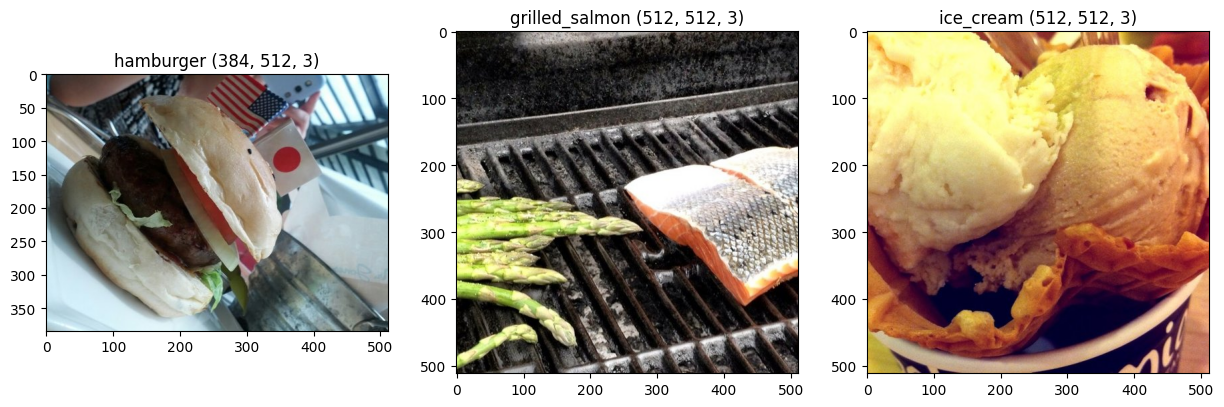

In [ ]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(15,7))
id = random.choice(range(0,749))
plt.subplot(1,3,1)
img_name = [f for f in os.listdir('10_food_classes_all_data/train/hamburger')][id]
img = plt.imread('10_food_classes_all_data/train/hamburger/'+img_name)
plt.imshow(img)
plt.title('hamburger '+str(img.shape))
plt.subplot(1,3,2)
img_name = [f for f in os.listdir('10_food_classes_all_data/train/grilled_salmon/')][id]
img = plt.imread('10_food_classes_all_data/train/grilled_salmon/'+img_name)
plt.imshow(img)
plt.title('grilled_salmon '+str(img.shape))
plt.subplot(1,3,3)
img_name = [f for f in os.listdir('10_food_classes_all_data/train/ice_cream/')][id]
img = plt.imread('10_food_classes_all_data/train/ice_cream/'+img_name)
plt.imshow(img)
plt.title('ice_cream '+str(img.shape));

In [ ]:
#Exploramos los características de las imágenes
lista_img_pizza = [f for f in os.listdir('10_food_classes_all_data/train/hamburger/')]
imagen_prueba = plt.imread('10_food_classes_all_data/train/hamburger/'+random.choice(lista_img_pizza)) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {imagen_prueba.shape}")
print(f"Dimensiones de la imagen: {imagen_prueba.ndim}")
print(f"Codificación la imagen: {imagen_prueba.dtype}")
print(f"Pixel de mayor valor: {imagen_prueba.max()}")
print(f"Pixel de menor valor: {imagen_prueba.min()}")

Shape de la imagen: (512, 512, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 255
Pixel de menor valor: 0


### Creamos la arquitectura CNN para multi-clasificación

In [ ]:
import tensorflow as tf
print(f"Version: {tf.__version__}")

Version: 2.13.0


In [ ]:
tf.random.set_seed(42)

train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical') #Usamos categorical para referirnos a que son más de dos clases
test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical') #'sparse'

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
images, etiquetas = train_batch[0]
etiquetas [:5] #ONE HOT ENCODER

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
classes

['ramen',
 'ice_cream',
 'pizza',
 'chicken_wings',
 'grilled_salmon',
 'fried_rice',
 'steak',
 'hamburger',
 'chicken_curry',
 'sushi']

In [ ]:
#Creamos la red convolucional

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 flatten_4 (Flatten)         (None, 27040)            

In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])

In [ ]:
model_1.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_1', save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_1'),
                         tf.keras.callbacks.EarlyStopping(patience=10),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5)])

Epoch 1/200
235/235 [==============================] - 34s 144ms/step - loss: 0.0519 - accuracy: 0.9887 - val_loss: 3.2209 - val_accuracy: 0.3620 - lr: 1.0000e-05
Epoch 2/200
235/235 [==============================] - 30s 127ms/step - loss: 0.0523 - accuracy: 0.9901 - val_loss: 3.2273 - val_accuracy: 0.3632 - lr: 1.0000e-05
Epoch 3/200
235/235 [==============================] - 32s 136ms/step - loss: 0.0439 - accuracy: 0.9925 - val_loss: 3.2537 - val_accuracy: 0.3628 - lr: 1.0000e-05
Epoch 4/200
235/235 [==============================] - 29s 123ms/step - loss: 0.0432 - accuracy: 0.9920 - val_loss: 3.2713 - val_accuracy: 0.3608 - lr: 1.0000e-05
Epoch 5/200
235/235 [==============================] - 34s 145ms/step - loss: 0.0471 - accuracy: 0.9905 - val_loss: 3.2804 - val_accuracy: 0.3612 - lr: 1.0000e-05
Epoch 6/200
235/235 [==============================] - 31s 132ms/step - loss: 0.0400 - accuracy: 0.9931 - val_loss: 3.3029 - val_accuracy: 0.3612 - lr: 1.0000e-05
Epoch 7/200
235/235 [=

### Evaluamos el modelo

In [ ]:
model_1 = tf.keras.models.load_model('/content/checkpoints/model_1')
model_1.evaluate(test_batch)

79/79 [==============================] - 7s 82ms/step - loss: 3.2209 - accuracy: 0.3620


[3.220930576324463, 0.3619999885559082]

### Hacemos una predicción

In [ ]:
# Elegimos una imagen de dataset a gusto
img = plt.imread('/content/10_food_classes_all_data/test/fried_rice/1023430.jpg')

#Rescalamos la imagen para introducirla al modelo
img = img/255.

#Ajustamos la imagen a 224,224,3

img.resize((224,224,3))
img_expanded = tf.expand_dims(img, axis=0)

y_pred = model_1.predict(img_expanded)
print(y_pred) #Softmax

1/1 [==============================] - 0s 159ms/step
[[6.50223446e-05 2.84640300e-05 4.83477750e-04 1.08369917e-04
  3.27930356e-05 1.03872124e-04 2.47863099e-01 1.38918059e-08
  7.50405252e-01 9.09567287e-04]]


In [ ]:
y_pred = tf.squeeze(y_pred)
tf.math.reduce_sum(y_pred).numpy()

0.99999994

In [ ]:
tf.argmax(y_pred).numpy()

8

In [ ]:
y_pred = tf.squeeze(y_pred)
y_pred = tf.round(y_pred)
print(f"La predicción para la imagen de pizza es: {y_pred} ") #ARGMAX

La predicción para la imagen de pizza es: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 


In [ ]:
y_pred = tf.argmax(y_pred) #argmax retorna el indice del item mayor de todos los items
print(f"La clase es: {classes[y_pred]}")

La clase es: chicken_curry


# Ejercicio 2

### 🛠️ Ajustamos los hiperparametros para mejorar las métricas del modelo con el set de testeo 🤓

Acá podemos probar de cambiar algunos hiperparámetros:
1. La cantidad de filtros de las capas convolucionales pueden ir creciendo (16, 32,...)
2. El tamaño del kernel de los filtros también puede crecer.
3. Podemos implementar data augmentation (más tecnicas).
4. Podemos usar dropout en la red profunda.
5. Podemos cambiar el learning rate.

### Data augmentation

Implementamos data augmentation

In [ ]:
import tensorflow as tf
tf.random.set_seed(10)

train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                 horizontal_flip=True,
                                                                 vertical_flip=True)

train_batch = train_generator.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_batch = test_generator.flow_from_directory(test_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Red Convolucional

Creamos la red convolucional.

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

Aumentamos los filtros de las capas convolucionales.

Aumentamos el tamaño del kernel de los filtros.

Utilizamos el dropout en la red profunda.

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    tf.keras.layers.Conv2D(20, kernel_size=(11,11), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout((0.05)),
    tf.keras.layers.Conv2D(20, kernel_size=(11,11), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20, kernel_size=(11,11), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo.

Cambio del learning rate.

Entrenamiento del modelo.

In [ ]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.00015),
                loss = tf.keras.losses.BinaryCrossentropy(),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_1.fit(train_batch,
            epochs=100,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_1', save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_1'),
                         tf.keras.callbacks.EarlyStopping(patience=10),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5)])

Epoch 1/100
235/235 [==============================] - 40s 149ms/step - loss: 0.3186 - accuracy: 0.2019 - precision_2: 0.3770 - recall_2: 0.0096 - val_loss: 0.2987 - val_accuracy: 0.2824 - val_precision_2: 0.5319 - val_recall_2: 0.0100 - lr: 1.5000e-04
Epoch 2/100
235/235 [==============================] - 33s 142ms/step - loss: 0.2971 - accuracy: 0.2743 - precision_2: 0.4441 - recall_2: 0.0381 - val_loss: 0.2894 - val_accuracy: 0.2936 - val_precision_2: 0.5586 - val_recall_2: 0.0248 - lr: 1.5000e-04
Epoch 3/100
235/235 [==============================] - 34s 146ms/step - loss: 0.2877 - accuracy: 0.3145 - precision_2: 0.5087 - recall_2: 0.0737 - val_loss: 0.2782 - val_accuracy: 0.3292 - val_precision_2: 0.6092 - val_recall_2: 0.0904 - lr: 1.5000e-04
Epoch 4/100
235/235 [==============================] - 37s 157ms/step - loss: 0.2789 - accuracy: 0.3428 - precision_2: 0.5242 - recall_2: 0.1067 - val_loss: 0.2780 - val_accuracy: 0.3448 - val_precision_2: 0.5969 - val_recall_2: 0.1072 - lr:

### Evaluación del modelo

In [ ]:
model_1 = tf.keras.models.load_model('/content/checkpoints/model_1')
model_1.evaluate(test_batch)

79/79 [==============================] - 8s 98ms/step - loss: 0.2444 - accuracy: 0.4624 - precision_2: 0.6077 - recall_2: 0.3036


[0.24436388909816742,
 0.46239998936653137,
 0.6076861619949341,
 0.303600013256073]

### Comparaciones

*   Cantidad de filtros de capas convolucionales modificada de 10 a 20.
*   Tamaño de kernel modificado de 3x3 a 11x11.
*   Data augmentation extra implementada: horizontal_flip, vertical_flip.
*   Dropout utilizado en la red profunda con un valor de 0.05.
*   Learning rate modificado de 0.0001 a 0.00015.
*   Score anterior:
```
loss: 3.2209 - accuracy: 0.3620
```
*   Score mejorado:
```
loss: 0.2444 - accuracy: 0.4624 - precision_2: 0.6077 - recall_2: 0.3036
```



---



## 3. Transfer Learning

O también conocido cómo `fine tuning` es el método por el cual instanciamos una red neuronal convolucional previamente entrenada para otra tarea, pero sus filtros de más bajo nivel sirven para muchos propositos.

Nosotros tomamos esa CNN y re-entrenamos sus capas de más alto nivel para el objetivo que queremos lograr (por ejemplo clasificar comida en imágenes).

Para esto `keras` ya tiene implementado varios arquitecturas pre-entrenadas, las más conocidas son:

* AlexNet
* VGG 16
* VGG 19
* Inception
* ResNet
* EfficientNet


In [ ]:
base_model = tf.keras.applications.VGG19(include_top=False, #sin la parte dnn
                                         weights='imagenet') #EfficienteNetB0
base_model.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer_num, layers in enumerate(base_model.layers):
  print(layer_num, layers)

0 <keras.src.engine.input_layer.InputLayer object at 0x7f649b010400>
1 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f649b0f5570>
2 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f649ad6d600>
3 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f649b0f60b0>
4 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f649b0f5960>
5 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f649b0f6110>
6 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f65310cf3a0>
7 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f65318e8220>
8 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f64bd5cdf60>
9 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f649ad6d570>
10 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f64bd5ceda0>
11 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f64bd5cef20>
12 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f64bd5cfe50>
13 <keras.src.layer

In [ ]:
#Creamos la red convolucional

model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_20 (Dense)            (None, 256)               6422784   
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 26449738 (100.90 MB)
Trainable params: 6425354 (24.51 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy'])
model_2.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
235/235 [==============================] - 58s 221ms/step - loss: 1.9735 - accuracy: 0.4272 - val_loss: 1.3723 - val_accuracy: 0.5492
Epoch 2/200
235/235 [==============================] - 48s 204ms/step - loss: 1.2640 - accuracy: 0.5788 - val_loss: 1.4124 - val_accuracy: 0.5120
Epoch 3/200
235/235 [==============================] - 56s 240ms/step - loss: 1.0867 - accuracy: 0.6403 - val_loss: 1.1279 - val_accuracy: 0.6276
Epoch 4/200
235/235 [==============================] - 48s 206ms/step - loss: 1.0067 - accuracy: 0.6648 - val_loss: 1.1405 - val_accuracy: 0.6144
Epoch 5/200
235/235 [==============================] - 47s 202ms/step - loss: 0.9003 - accuracy: 0.6993 - val_loss: 1.1133 - val_accuracy: 0.6260
Epoch 6/200
235/235 [==============================] - 57s 241ms/step - loss: 0.8280 - accuracy: 0.7272 - val_loss: 1.0880 - val_accuracy: 0.6424
Epoch 7/200
235/235 [==============================] - 48s 205ms/step - loss: 0.7856 - accuracy: 0.7413 - val_loss: 1.0354 -

In [ ]:
model_2.evaluate(test_batch)

79/79 [==============================] - 12s 151ms/step - loss: 1.1710 - accuracy: 0.6572


[1.1709688901901245, 0.6571999788284302]

>**Nota:** Vemos que la implementación de la tecnica de `Transfer Learning` con un modelo pre-entrenado mejoro sustancialmente los valores de las métricas de evaluación.

# Ejercicio 3

### 🛠️ Ajustamos los hiperparametros para mejorar las métricas del modelo con el set de testeo 🤓

Acá podemos probar de cambiar algunos hiperparámetros:
1. Probar otras redes pre entrenadas convolucionales: ['ResNet101','EfficientNetB0','InceptionNet']

[Link](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

## Probamos ResNet152V2

Instanciamos el modelo según el tipo de entrenamiento de la red.



In [ ]:
import tensorflow as tf
tf.random.set_seed(15)

base_model = tf.keras.applications.ResNet152V2(include_top=False,
                                               weights='imagenet')

base_model.trainable = False

234545216/234545216 [==============================] - 6s 0us/step


### Creamos la red convolucional

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo.

Entrenamos el modelo.

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_2.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_2', save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_2'),
                         tf.keras.callbacks.EarlyStopping(patience=10),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5)])

Epoch 1/200
235/235 [==============================] - 142s 557ms/step - loss: 2.7282 - accuracy: 0.5928 - precision_3: 0.7060 - recall_3: 0.5044 - val_loss: 0.9996 - val_accuracy: 0.6964 - val_precision_3: 0.8188 - val_recall_3: 0.6036 - lr: 0.0010
Epoch 2/200
235/235 [==============================] - 127s 542ms/step - loss: 0.9735 - accuracy: 0.7085 - precision_3: 0.8285 - recall_3: 0.6351 - val_loss: 0.8824 - val_accuracy: 0.7340 - val_precision_3: 0.8178 - val_recall_3: 0.6680 - lr: 0.0010
Epoch 3/200
235/235 [==============================] - 130s 552ms/step - loss: 0.7878 - accuracy: 0.7544 - precision_3: 0.8494 - recall_3: 0.6969 - val_loss: 0.8210 - val_accuracy: 0.7608 - val_precision_3: 0.8329 - val_recall_3: 0.7056 - lr: 0.0010
Epoch 4/200
235/235 [==============================] - 131s 556ms/step - loss: 0.7058 - accuracy: 0.7864 - precision_3: 0.8673 - recall_3: 0.7300 - val_loss: 0.7924 - val_accuracy: 0.7532 - val_precision_3: 0.8431 - val_recall_3: 0.6856 - lr: 0.0010


### Evaluamos el modelo.

In [ ]:
model_2 = tf.keras.models.load_model('/content/checkpoints/model_2')
model_2.evaluate(test_batch)

79/79 [==============================] - 22s 236ms/step - loss: 0.7911 - accuracy: 0.8088 - precision_3: 0.8326 - recall_3: 0.7960


[0.7911084294319153,
 0.8087999820709229,
 0.8326359987258911,
 0.7960000038146973]

## Probamos InceptionResNetV2

Instanciamos el modelo según el tipo de entrenamiento de la red.

In [ ]:
import tensorflow as tf
tf.random.set_seed(15)

base_model = tf.keras.applications.InceptionResNetV2(include_top=False,
                                                     weights='imagenet')

base_model.trainable = False

219055592/219055592 [==============================] - 1s 0us/step


### Red Convolucional

Creamos la red convolucional.

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo.

Entrenamos el modelo.

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_2.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_2', save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_2'),
                         tf.keras.callbacks.EarlyStopping(patience=10),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5)])

Epoch 1/200
235/235 [==============================] - 146s 565ms/step - loss: 3.2790 - accuracy: 0.6273 - precision_4: 0.6618 - recall_4: 0.6076 - val_loss: 0.9797 - val_accuracy: 0.7284 - val_precision_4: 0.7713 - val_recall_4: 0.7000 - lr: 0.0010
Epoch 2/200
235/235 [==============================] - 126s 536ms/step - loss: 0.9558 - accuracy: 0.7207 - precision_4: 0.7800 - recall_4: 0.6785 - val_loss: 0.7276 - val_accuracy: 0.7848 - val_precision_4: 0.8230 - val_recall_4: 0.7496 - lr: 0.0010
Epoch 3/200
235/235 [==============================] - 125s 535ms/step - loss: 0.7456 - accuracy: 0.7743 - precision_4: 0.8281 - recall_4: 0.7289 - val_loss: 0.6490 - val_accuracy: 0.7984 - val_precision_4: 0.8384 - val_recall_4: 0.7740 - lr: 0.0010
Epoch 4/200
235/235 [==============================] - 125s 532ms/step - loss: 0.6617 - accuracy: 0.7908 - precision_4: 0.8443 - recall_4: 0.7509 - val_loss: 0.6361 - val_accuracy: 0.7956 - val_precision_4: 0.8449 - val_recall_4: 0.7604 - lr: 0.0010


### Evaluamos el modelo

In [ ]:
model_2 = tf.keras.models.load_model('/content/checkpoints/model_2')
model_2.evaluate(test_batch)

79/79 [==============================] - 18s 176ms/step - loss: 0.5503 - accuracy: 0.8340 - precision_4: 0.8582 - recall_4: 0.8208


[0.5502598285675049,
 0.8339999914169312,
 0.8582183122634888,
 0.8208000063896179]

## Probamos EfficientNetV2L

Instanciamos el modelo según el tipo de entrenamiento de la red.

In [ ]:
import tensorflow as tf
tf.random.set_seed(15)

base_model = tf.keras.applications.EfficientNetV2L(include_top=False,
                                                   weights='imagenet')

base_model.trainable = False

473176280/473176280 [==============================] - 16s 0us/step


### Red Concolucional

Creamos la red convolucional.

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=([224,224,3])),
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Compilamos el modelo.

Entrenamos el modelo.

In [ ]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_2.fit(train_batch,
            epochs=200,
            validation_data = test_batch,
            callbacks = [tf.keras.callbacks.ModelCheckpoint('checkpoints/model_2', save_best_only=True),
                         tf.keras.callbacks.TensorBoard('logs/model_2'),
                         tf.keras.callbacks.EarlyStopping(patience=10),
                         tf.keras.callbacks.ReduceLROnPlateau(patience=5)])

Epoch 1/200
235/235 [==============================] - 297s 1s/step - loss: 7.9096 - accuracy: 0.1009 - precision_5: 0.1059 - recall_5: 0.0500 - val_loss: 2.7099 - val_accuracy: 0.1452 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - lr: 0.0010
Epoch 2/200
235/235 [==============================] - 267s 1s/step - loss: 2.9769 - accuracy: 0.1128 - precision_5: 0.1155 - recall_5: 0.0121 - val_loss: 2.4511 - val_accuracy: 0.1124 - val_precision_5: 0.1500 - val_recall_5: 0.0012 - lr: 0.0010
Epoch 3/200
235/235 [==============================] - 267s 1s/step - loss: 2.5076 - accuracy: 0.1036 - precision_5: 0.1053 - recall_5: 0.0037 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_precision_5: 0.0000e+00 - val_recall_5: 0.0000e+00 - lr: 0.0010
Epoch 4/200
235/235 [==============================] - 120s 509ms/step - loss: 2.3040 - accuracy: 0.0981 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 2.3026 - val_accuracy: 0.1000 - val_precision_5: 0.0000e+00 - val_recall_5: 0

### Evaluamos el modelo

In [ ]:
model_2 = tf.keras.models.load_model('/content/checkpoints/model_2')
model_2.evaluate(test_batch)

79/79 [==============================] - 40s 374ms/step - loss: 2.3026 - accuracy: 0.1000 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00


[2.3025825023651123, 0.10000000149011612, 0.0, 0.0]

## Comparaciones

*   Score de VGG 19:
```
loss: 1.1710 - accuracy: 0.6572
```
*   Score de ResNet152V2:
```
loss: 0.7911 - accuracy: 0.8088 - precision_3: 0.8326 - recall_3: 0.7960
```
*   Score de InceptionResNetV2
```
loss: 0.5503 - accuracy: 0.8340 - precision_4: 0.8582 - recall_4: 0.8208
```
*   Score de EfficientNetV2L
```
loss: 2.3026 - accuracy: 0.1000 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00
```
De los tres modelos, el que obtuvo un mejor resulado fue InceptionResNetV2